In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import seaborn as sns; sns.set(color_codes=True)


## Introduction

Cars are important part of modern life. While for some cars are a mean to get to A to B, for others cars are a necessity to conduct their day to day business. Driving car has become such an integral part of our lives that sometimes we forget the dangers that are associated with it. Accidents can happen even to the most careful among us and when accidents do happen car insurance is the only thing that can save us from a lot of personal liabilities which we are otherwise accountable for.

We know car Insurance premium varies from driver to driver and there are lots of variables at work behind that, for example: age of the driver, driving record etc. We also pay higher or lower insurance depending on which state we live in. Can we predict the average insurance premiums for states from the driving record of that state.

In this project we will look at some car insurance related data from each of the 50 states and D.C., pick two variables from the data and try to predict average car insurance premium using those two variables and compare them with actual data.

## Data Collection

Data was collected from, https://github.com/fivethirtyeight/data/blob/master/bad-drivers/bad-drivers.csv

The dataset contains data on number of drivers involved in fatal collisions per billion miles, diferent conditions under those collisions happend, car insurance premium in U.S. dollars and losses incurred by insurance companies for collisions per insured driver in U.S. dollars for all 50 states of United States of America and District of Columbia.

**Load DATA**

In [2]:
rawData = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv')
print rawData.head(5)

        State  \
0     Alabama   
1      Alaska   
2     Arizona   
3    Arkansas   
4  California   

   Number of drivers involved in fatal collisions per billion miles  \
0                                               18.8                  
1                                               18.1                  
2                                               18.6                  
3                                               22.4                  
4                                               12.0                  

   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding  \
0                                                 39                      
1                                                 41                      
2                                                 35                      
3                                                 18                      
4                                                 35                      

   Percentage Of Dr

## Data Cleansing

I have removed the unnecessary columns from the original data and renamed the column for ease of analysis. We have one table with four columns, below are the names of the columns and what they represent:

-   state: names of the state that the data reprensents.

-   fatal_accident: Number of drivers involved in fatal collisions per billion miles.

-   losses: Losses incurred by insurance companies for collisions per insured driver ($).

-   insurance_premiums: Average car insurance premiums for the state ($)

In [3]:
df = rawData[['State','Number of drivers involved in fatal collisions per billion miles','Losses incurred by insurance companies for collisions per insured driver ($)','Car Insurance Premiums ($)']]
df = df.rename(columns ={'State':'state', 'Number of drivers involved in fatal collisions per billion miles':'fatal_accident',
                         'Losses incurred by insurance companies for collisions per insured driver ($)':'losses',
                         'Car Insurance Premiums ($)':'insurance_premiums'})
print df.head(5)

        state  fatal_accident  losses  insurance_premiums
0     Alabama            18.8  145.08              784.55
1      Alaska            18.1  133.93             1053.48
2     Arizona            18.6  110.35              899.47
3    Arkansas            22.4  142.39              827.34
4  California            12.0  165.63              878.41


Following is a interactive map of United States containing my dataset:

In [4]:
df_plot = df
df_plot['code'] = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
              'ME','MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
              'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


for col in df.columns:
    df_plot[col] = df_plot[col].astype(str)

scl = [[0.0, 'rgb(255,204,204)'],[0.2, 'rgb(255,153,153)'],[0.4, 'rgb(255,102,102)'],\
            [0.6, 'rgb(255,51,51)'],[0.8, 'rgb(255,0,0)'],[1.0, 'rgb(204,0,0)']]

df_plot['text'] = df_plot['state'] + '<br>' +\
    'Number of drivers involved in fatal collisions per billion miles '+df['fatal_accident']+'<br>'+\
    ' Losses incurred by insurance companies for collisions per insured driver ($) '+df['losses']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_plot['code'],
        z = df_plot['insurance_premiums'].astype(float),
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'US Car Insurance Premimums by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename = 'US_insurance')

Bar plot representing all three of variables:

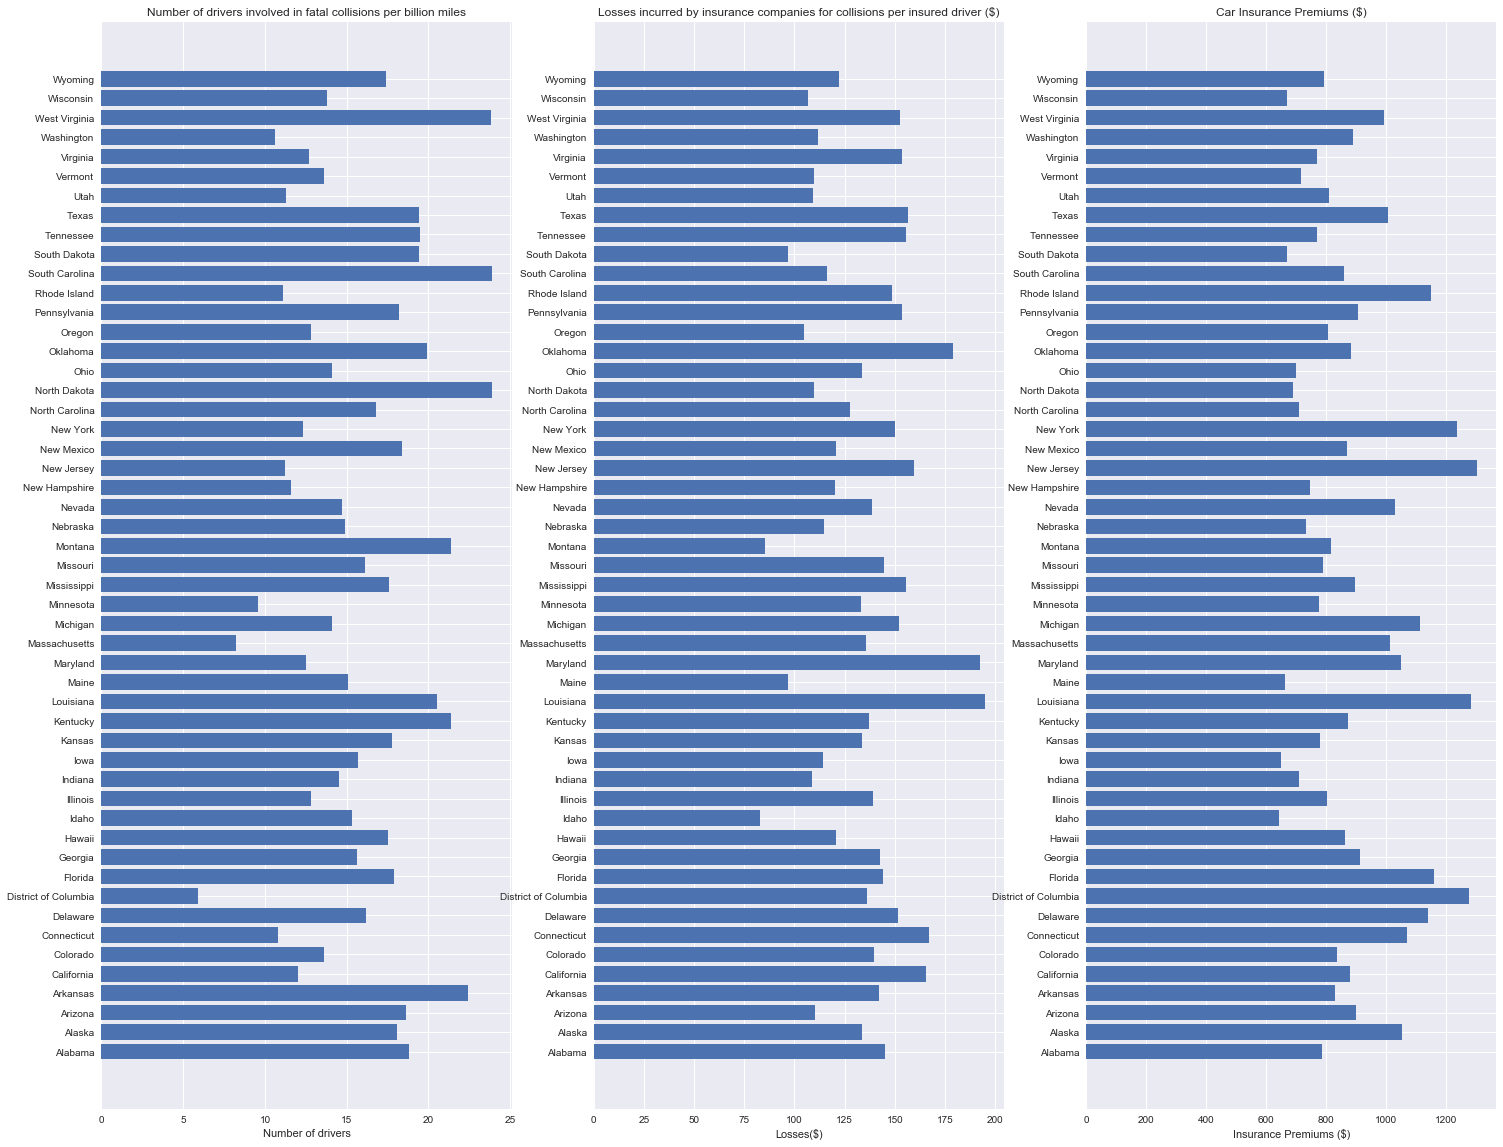

In [5]:
state = df['state']

plt.rcParams["figure.figsize"] = (5, 20)

plt.subplot(131)
y_pos= np.arange(len(state))
fatal_accident = df['fatal_accident']
 
plt.barh(y_pos, fatal_accident, align='center', alpha=1)
plt.yticks(y_pos, state)
plt.xlabel('Number of drivers')
plt.title('Number of drivers involved in fatal collisions per billion miles')

 

plt.subplot(132)
plt.subplots_adjust(right=4)
y_pos= np.arange(len(state))
losses = df['losses']
 
plt.barh(y_pos, losses, align='center', alpha=1)
plt.yticks(y_pos, state)
plt.xlabel('Losses($)')
plt.title('Losses incurred by insurance companies for collisions per insured driver ($)')

 

plt.subplot(133)
y_pos= np.arange(len(state))
insurance_premiums = df['insurance_premiums']
 
plt.barh(y_pos, insurance_premiums, align='center', alpha=1)
plt.yticks(y_pos, state)
plt.xlabel('Insurance Premiums ($)')
plt.title('Car Insurance Premiums ($)')

plt.show()

## Prediction and Analysis


**Prepare Data for Analysis**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df2 = df[['state', 'fatal_accident', 'losses', 'insurance_premiums']]
df_lm = pd.DataFrame(df2)
df_lm.set_index('state', inplace=True)
df_lm['insurance_premiums'] = df_lm['insurance_premiums'].astype(float)
df_lm['fatal_accident'] = df_lm['fatal_accident'].astype(float)
df_lm[ 'losses'] = df_lm[ 'losses'].astype(float)


Now, let's find the slope and the intercept point of the regression line for the two explanatory variables, and create prediction models:

**fatal_accident model**

In [7]:
fatal_accident = df_lm['fatal_accident'].values.reshape(-1, 1)
insurance_premiums = df_lm['insurance_premiums'].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(fatal_accident, insurance_premiums)


b_0   = lm.intercept_
coeff1 = lm.coef_
score = lm.score(fatal_accident[:], insurance_premiums[:])

# Predict insurance premiums from the model 
pre1 = lm.predict(fatal_accident)

print 'intercept point of the regression line', b_0
print 'slope and the intercept point of the regression', coeff1
print 'R squred value', score

intercept point of the regression line [ 1023.35435739]
slope and the intercept point of the regression [[-8.63806312]]
R squred value 0.0398808671123


If the number of drivers involved in fatal collisions per billion miles increases by 1 the insurance premium goes down by $8.64, which is surprising. Only 3.99% of the variance found in the response variable (insurance_premiums) can be explained by the explanatory variable (fatal_accident).

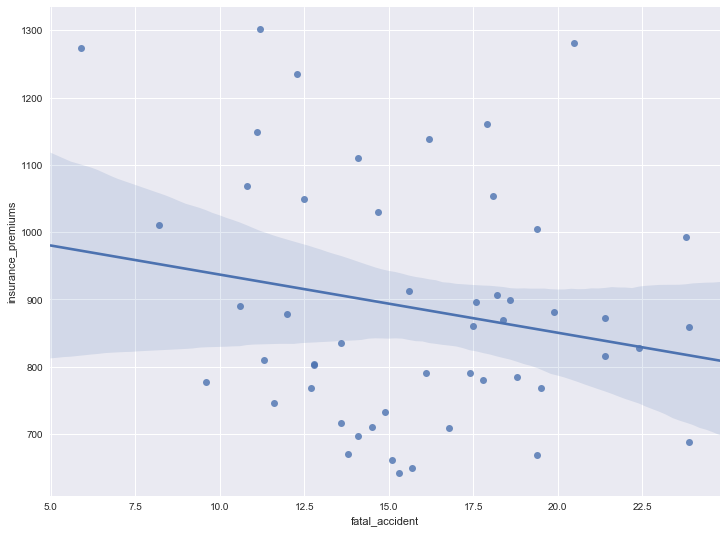

In [8]:
plt.rcParams["figure.figsize"] = (12 ,9)
ax = sns.regplot(x="fatal_accident", y="insurance_premiums", data=df_lm)

plt.show(ax)

 From the plot above we can see there is a very weak negative linear relationship between ***insurance_premiums*** and ***fatal_accident***.

**losses model**

In [9]:
losses = df_lm['losses'].values.reshape(-1, 1)

lm = LinearRegression()
lm.fit(losses, insurance_premiums)

b_1  = lm.intercept_
coeff2 = lm.coef_
score1 = lm.score(losses[:], insurance_premiums[:])

# Predict insurance premiums from the model 
pre2 = lm.predict(losses)

print 'intercept point of the regression line', b_1
print 'slope and the intercept point of the regression', coeff2
print 'R squred value', score1

intercept point of the regression line [ 285.32508867]
slope and the intercept point of the regression [[ 4.47333277]]
R squred value 0.388274095953


Every dollar increase in losses incurred by the insurance companies the insurance premimum goes up by $4.4733, roughly 38.83% of the of the variance found in the response variable (insurance_premiums) can be explained by this predictor variable (losses).

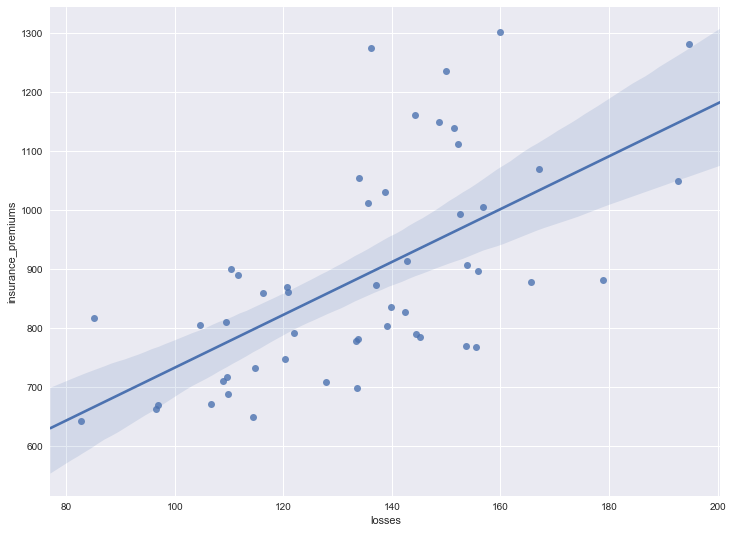

In [10]:
ax = sns.regplot(x="losses", y="insurance_premiums", data=df_lm)

plt.show(ax)

From the plot above we can see there is a moderate positive linear relationship between ***insurance_premiums*** and ***losses***.

New dataframe with predicted insurance premiums using the explanatory variables:

In [11]:
df_lm['prediction(fatal_accident)'] = pre1
df_lm['prediction(losses)'] = pre2

print df_lm

                      fatal_accident  losses  insurance_premiums  \
state                                                              
Alabama                         18.8  145.08              784.55   
Alaska                          18.1  133.93             1053.48   
Arizona                         18.6  110.35              899.47   
Arkansas                        22.4  142.39              827.34   
California                      12.0  165.63              878.41   
Colorado                        13.6  139.91              835.50   
Connecticut                     10.8  167.02             1068.73   
Delaware                        16.2  151.48             1137.87   
District of Columbia             5.9  136.05             1273.89   
Florida                         17.9  144.18             1160.13   
Georgia                         15.6  142.80              913.15   
Hawaii                          17.5  120.92              861.18   
Idaho                           15.3   82.75    

I will now find three states containing observed maximum, median and minimum insurance premiums and compare them with my predictions. I will also use ***Least Square Regression Line Equation*** to find my predicted insurance premiums instead of just plugging them directly from my data frame above.


State with ***Highest Insurance Premimum***

In [12]:
max = np.max(df_lm['insurance_premiums'])
df_max = df_lm[df_lm.insurance_premiums == max]
print df_max

            fatal_accident  losses  insurance_premiums  \
state                                                    
New Jersey            11.2  159.85             1301.52   

            prediction(fatal_accident)  prediction(losses)  
state                                                       
New Jersey                   926.60805         1000.387332  


State with ***Median Insurance Premimum***

In [13]:
median = np.median(df_lm['insurance_premiums'])
df_median = df_lm[df_lm.insurance_premiums == median]
print df_median

                fatal_accident  losses  insurance_premiums  \
state                                                        
South Carolina            23.9  116.29              858.97   

                prediction(fatal_accident)  prediction(losses)  
state                                                           
South Carolina                  816.904649          805.528957  


State with ***Lowest Insurance Premimum***

In [14]:
min = np.min(df_lm['insurance_premiums'])
df_min = df_lm[df_lm.insurance_premiums == min]
print df_min

       fatal_accident  losses  insurance_premiums  prediction(fatal_accident)  \
state                                                                           
Idaho            15.3   82.75              641.96                  891.191992   

       prediction(losses)  
state                      
Idaho          655.493375  


***Least Square Regression Line Equation:***

$$\hat{y} = \beta_0 + \beta_1x$$

$\beta_1$ = The slope of the regression line

$\beta_0$ = The intercept point of the regression line and the y axis.

Estimate New Jersey average insurance premimum by looking at number of drivers involved in fatal collisions per billion miles:

In [15]:
fa1 = df_max.ix['New Jersey','fatal_accident']
nj = round(b_0 + (coeff1 * fa1),2)
print "New Jersey", nj

New Jersey 926.61


Our model under estimates the insurance premimum by:

In [16]:
round(max - nj,2)

374.91

Estimate South Carolina average insurance premimum by looking at number of drivers involved in fatal collisions per billion miles:

In [17]:
fa2 = df_median.ix['South Carolina','fatal_accident']
sc = round(b_0 + (coeff1 * fa2),2)
print "South Carolina", sc

South Carolina 816.9


Our model under estimates the insurance premimum by 

In [18]:
round(median - sc,2)

42.07

In [19]:
fa3 = df_min.ix['Idaho','fatal_accident']
id = round(b_0 + (coeff1 * fa3),2)
print "Idaho", id

Idaho 891.19


Our model over estimates the insurance premimum by

In [20]:
round(id - min,2)

249.23

Estimate New Jersey average insurance premimum by looking at losses incurred by insurance companies for collisions per insured driver ($):

In [21]:
los1 = df_max.ix['New Jersey','losses']
nj1 = round(b_1 + (coeff2 * los1),2)
print "New Jersey", nj1

New Jersey 1000.39


Our model under estimates the insurance premimum by

In [22]:
round(max - nj1,2)

301.13

Estimate South Carolina average insurance premimum by looking at losses incurred by insurance companies for collisions per insured driver ($):

In [23]:
los2 = df_median.ix['South Carolina','losses']
sc1 = round(b_1 + (coeff2 * los2),2)
print "South Carolina", sc1

South Carolina 805.53


Our model under estimates the insurance premimum by

In [24]:
round(median - sc1,2)

53.44

Estimate Idaho average insurance premimum by looking at losses incurred by insurance companies for collisions per insured driver ($):

In [25]:
los3 = df_min.ix['Idaho','losses']
id1 = round(b_1 + (coeff2 * los3),2)
print "Idaho", id1

Idaho 655.49


Our model over estimates the insurance premimum by

In [26]:
round(id1 - min,2)

13.53

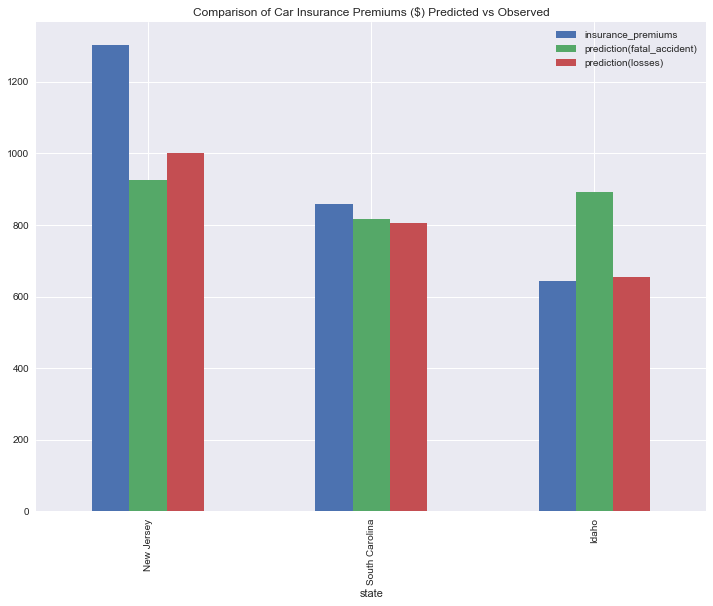

In [27]:
plot = df_lm[['insurance_premiums', 'prediction(fatal_accident)', 'prediction(losses)']]
plot1 = plot.ix[['New Jersey', 'South Carolina', 'Idaho']]
plot1 = pd.DataFrame(plot1)
plot1['state'] = plot1.index
grouped = plot1.groupby('state')
plot1.plot(x="state", y=["insurance_premiums", "prediction(fatal_accident)", "prediction(losses)"], kind="bar")
plt.title('Comparison of Car Insurance Premiums ($) Predicted vs Observed')
plt.show()

## Conclusion:

In my project I have tried to estimate average insurance premimum by states from two variables from my initial data set using linear regression model and compare it with actual value. One of my variable, “losses incurred by insurance companies for collisions per insured driver ($)” came closest to actual value but still the difference is too high. There are lots of other varibles that contributes to this difference in average insurance premimums which are out of scope for this project.


## References:

-   http://rpubs.com/choudhury1023/235289
-   https://plot.ly/python/choropleth-maps/
-   http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
-   http://davidcoallier.com/blog/linear-regression-from-r-to-python/
-   https://chrisalbon.com/python/pandas_indexing_selecting.html
-   http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
-   http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
-   https://pythonspot.com/en/matplotlib-bar-chart/